MNIST Digits classification Dataset

This is a dataset of 60,000 28*28 grayscale images of the 10 digits, along with a test set of 10,000 images. More inf can be found at the 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist

# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


In [ ]:
# Convert from integers to floats.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data to help with the encoding.
X_train /= 255
X_test /= 255

# One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Main Part:

The MNIST with 2 convolutional layers:

16 (3x3) convolutional filters
(2x2) max pooling 
32 (3x3) convolutional filters
(2,2) max pooling 
1 fully connected layer with 64 neurons (Flatten)

dropout rate = 0.5

softmax output layer

In [ ]:
# Step 2 Model
# 28,28,1. The 1 means non color image, just black and white. You have to change to 3 if it's a color image.

L1 = 16
L2 = 32
L3 = 64

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=30,batch_size=100,validation_data=(X_test,Y_test))

Epoch 1/30
600/600 [==============================] - 38s 61ms/step - loss: 0.4253 - accuracy: 0.8689 - val_loss: 0.0918 - val_accuracy: 0.9704
Epoch 2/30
600/600 [==============================] - 28s 47ms/step - loss: 0.1654 - accuracy: 0.9506 - val_loss: 0.0623 - val_accuracy: 0.9795
Epoch 3/30
600/600 [==============================] - 28s 47ms/step - loss: 0.1277 - accuracy: 0.9621 - val_loss: 0.0467 - val_accuracy: 0.9837
Epoch 4/30
600/600 [==============================] - 28s 46ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.0391 - val_accuracy: 0.9867
Epoch 5/30
600/600 [==============================] - 28s 47ms/step - loss: 0.0937 - accuracy: 0.9713 - val_loss: 0.0361 - val_accuracy: 0.9871
Epoch 6/30
600/600 [==============================] - 28s 46ms/step - loss: 0.0854 - accuracy: 0.9733 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 7/30
600/600 [==============================] - 27s 46ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0330 - val_accuracy:

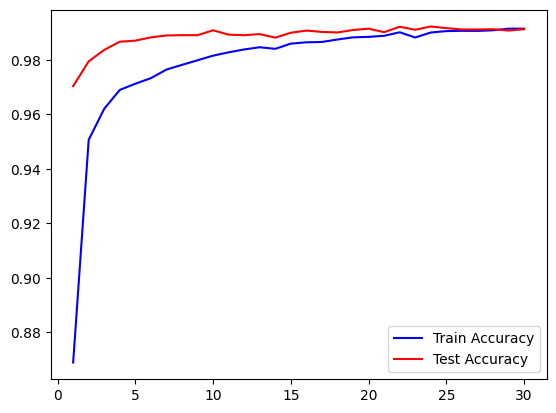

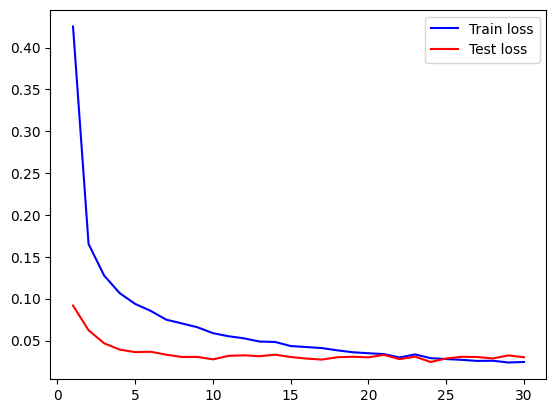

In [ ]:
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()